# **Exploratory data analysis**

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud ,STOPWORDS

In [19]:
df = pd.read_csv('/content/drive/My Drive/Copy of train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [22]:
df.shape

(159571, 8)

In [23]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [24]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

There are no null column values.


#### **Calculating total count of each category comments**


In [25]:
# dropping id and comment text
df_toxic = df.drop(['id', 'comment_text'], axis=1)
# calculating total count of each category comments
counts = []
categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'count'])
df_stats

,category,count
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


#### **Bar Graph for number of comments for each tag**

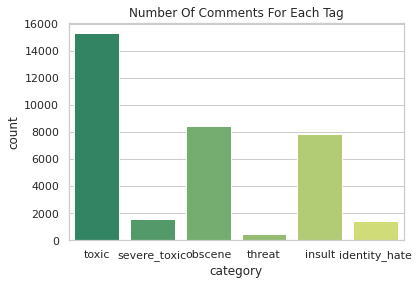

In [26]:
# df_toxic.sum().plot(kind="bar")

sns.set(style="whitegrid")
sns.barplot(x='category', y='count', data=df_stats, palette="summer")
plt.title("Number Of Comments For Each Tag")
plt.show()

##### **This shows that the number of comments in each category is extremely unbalanced.**

#### **Graph for distribution of lengths of comments**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


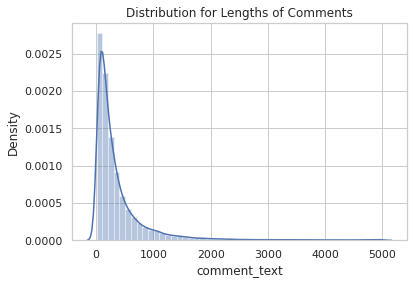

In [27]:
lens = df.comment_text.str.len()
sns.distplot(lens)
plt.title("Distribution for Lengths of Comments")
plt.show()
# This indicates that most of the comments are of lengths less than 500, while some are of length 5000 as well.

##### **This indicates that most of the comments are of lengths less than 500, while some are of length 5000 as well.**

#### **Number of vacant comments**

In [28]:
print("# Of Vacant Comments : ", df['comment_text'].isnull().sum())

# Of Vacant Comments :  0


In [29]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

# **MULTI TAGGING/Multi-Labelled DATA**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


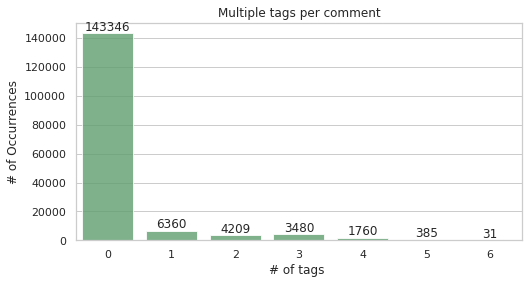

89.83211235124176 % comments have no labels associated to them.


In [30]:

color = sns.color_palette()
rowsums = df_toxic.iloc[:,:].sum(axis=1)

x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags per comment")
plt.xlabel('# of tags ', fontsize=12)
plt.ylabel('# of Occurrences', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()



print(x[0]*100/sum(x),"% comments have no labels associated to them.")


##### **This essentially shows that a large amount of the entire dataset is tagged to none of the six labels**

# **Correlation matrix**

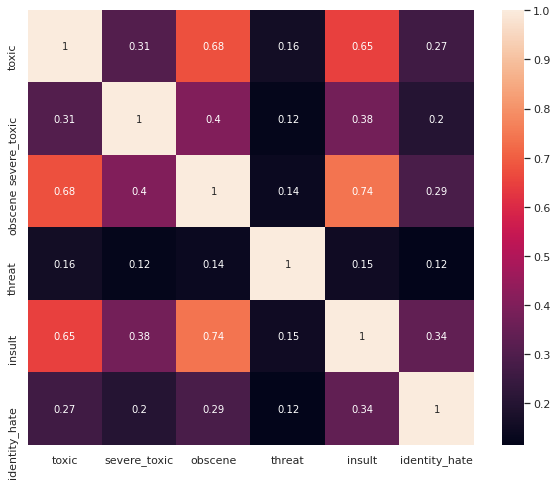

In [31]:
%matplotlib inline
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

# **Some examples of differently labelled toxic comments**

In [32]:
print("toxic:")
print(df[df.severe_toxic==1].iloc[3,1])
print("severe_toxic:")
print(df[df.severe_toxic==1].iloc[4,1])
print("Threat:")
print(df[df.threat==1].iloc[1,1])
# That was a whole lot of toxicity. 

toxic:
Hi 

Im a fucking bitch.

50.180.208.181
severe_toxic:
What a motherfucking piece of crap those fuckheads for blocking us!
Threat:
I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms


# **Wordclouds - Frequent words**
More frequent words appear bigger. 

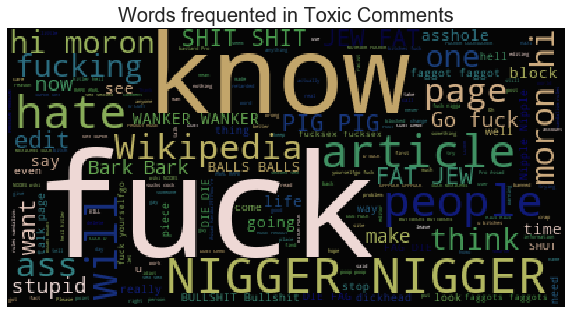

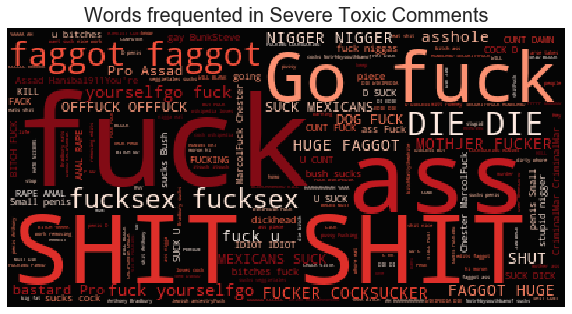

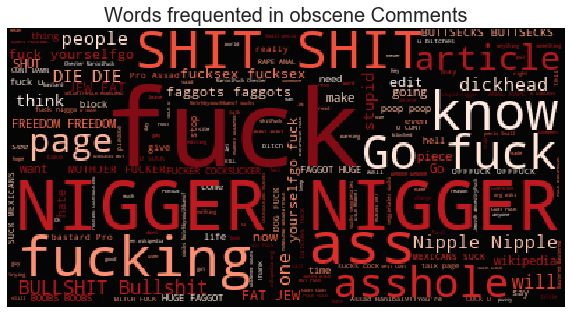

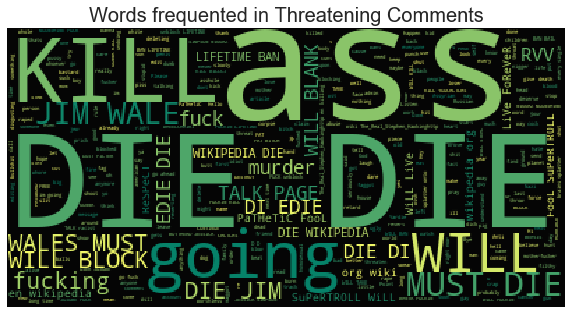

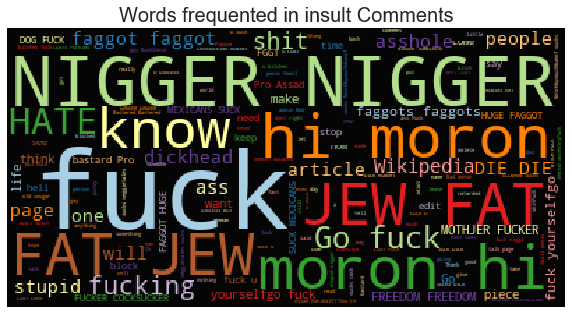

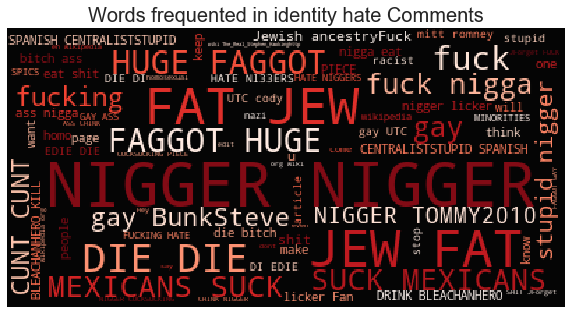

In [ ]:
stopword=set(STOPWORDS)

#wordcloud for toxic comments
subset=df[df.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(10,10))
# plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

#Severely toxic comments
# plt.subplot(222)
subset=df[df.severe_toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Words frequented in Severe Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)
plt.show()

#Obscene comments
# plt.subplot(223)
subset=df[df.obscene==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Words frequented in obscene Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)
plt.show()

#Threat comments
# plt.subplot(224)
subset=df[df.threat==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Words frequented in Threatening Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'summer' , random_state=2534), alpha=0.98)
plt.show()

#insult
# plt.subplot(225)
subset=df[df.insult==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Words frequented in insult Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
plt.show()

# #identity_hate comments
# plt.subplot(226)
subset=df[df.identity_hate==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Words frequented in identity hate Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)


plt.show()